In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\portfolio\Fractal MMM\Assignment\PYQ2\data\mmm_data_cleaned.csv")

We'll explore:

1. **Sales Trends Over Time** – seasonal patterns, growth
    
2. **Seasonality** – holiday impact, month/week trends
    
3. **Discount Impact** – check if Discount1/2 align with spikes in sales
    
4. **Marketing Spend vs. Impressions** – for ROI intuition
    
5. **Organic vs. Paid Traffic Contributions**
    
6. **Economic Factor Impact** – how gasoline prices relate to sales

7. **Correlations** – between sales and all predictors


## **Sales Trends Over Time**

In [3]:
df['Week_Ending'] = pd.to_datetime(df['Week_Ending'], errors='coerce')

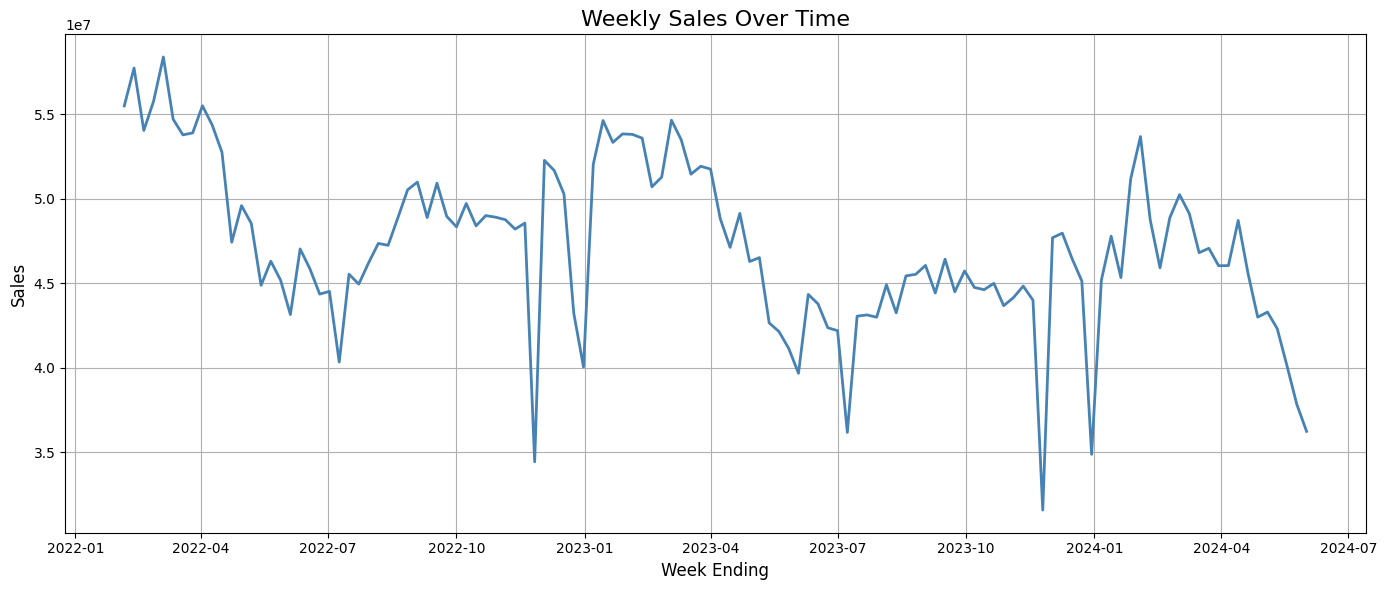

In [4]:
# Plot weekly sales over time
plt.figure(figsize=(14, 6))
plt.plot(df['Week_Ending'], df['Sales'], color='steelblue', linewidth=2)
plt.title('Weekly Sales Over Time', fontsize=16)
plt.xlabel('Week Ending', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



#### 1. **Year-End Dips**

- Sharp drops every late December — likely due to holidays, inventory breaks, or low post-festival demand.
    

#### 2. **Mid-Year Slowdowns**

- Noticeable slump around June–July, possibly tied to non-promotional periods or off-season dips in demand.
    

#### 3. **Q1 Bounce-Back**

- Strong recoveries in Jan–Mar hint at New Year promos or renewed marketing pushes.
    

#### 4. **Spiky Highs**

- Occasional peaks likely driven by seasonal campaigns, promotions, or media bursts.
    

#### 5. **2023 vs. 2022**

- 2023 sees lower, more erratic peaks — could be due to budget cuts, market fatigue, or economic pressure.
    

#### 6. **Flat Growth Overall**

- No clear upward momentum. The brand’s holding steady, but not scaling.

## **Seasonality Effects**

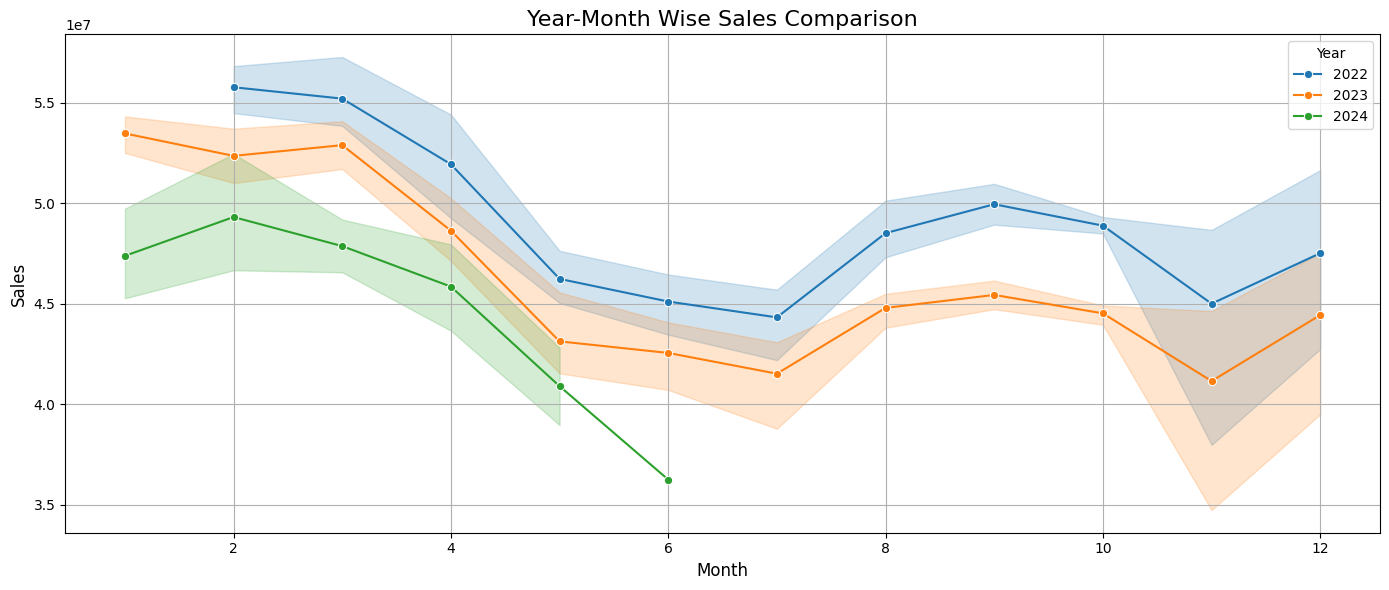

In [5]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Month', y='Sales', hue='Year', marker='o', palette='tab10')
plt.title('Year-Month Wise Sales Comparison', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


#### 1. **Strong Starts**

- Jan–Mar always outperforms — driven by New Year buzz, winter demand, or fresh campaigns. That early-year strength fades a bit in 2023 and 2024.
#### 2. **Mid-Year Dip (May–Jul)**

- Consistent slump mid-year, likely due to low promos, summer demand drop, or marketing slowdowns.
#### 3. **November Dips**

- Noticeable drop in Nov (2022 & 2023), maybe from fatigue, shifted budgets, or lack of promos.
#### 4. **December Comeback**

- Strong finish in December — likely fueled by holiday promos and year-end pushes.

#### 5. **Clear Seasonal Pattern**

- Sales follow a U-curve every year — strong in Jan–Mar, dip in May–Jul, partial lift later on.

#### 6. **2024 Falling Behind**

- 2024 sales trail previous years across the board — could point to lower spend, weaker media, or broader market pressure.

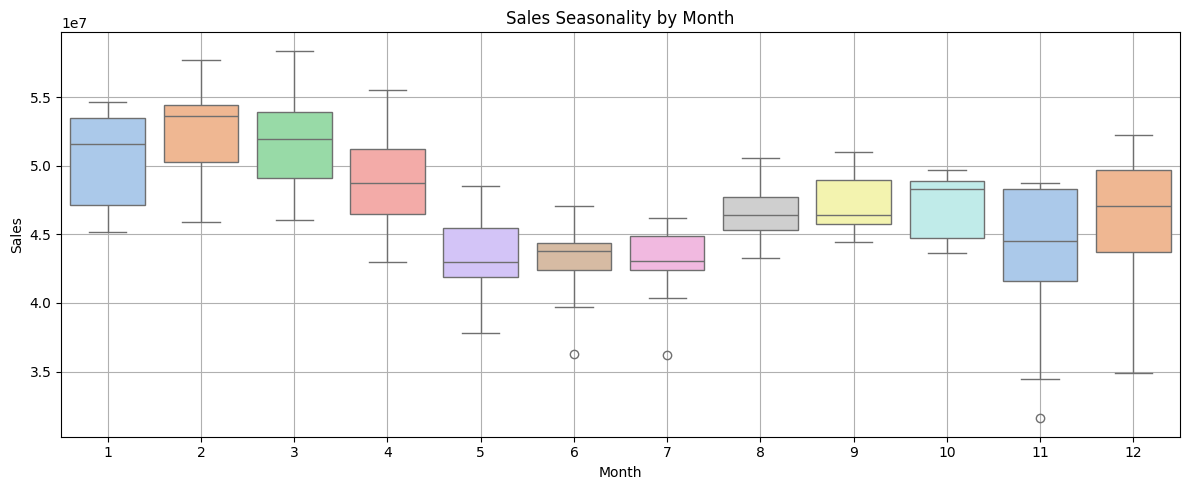

In [6]:
# Prepare figure for seasonality by Month
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Month', y='Sales', palette='pastel')
plt.title('Sales Seasonality by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 1. **Q1 Leads the Pack**

- Jan–Mar consistently top the charts with high medians and big spikes — classic New Year push, winter demand, and fresh budgets.
#### 2. **Mid-Year Slump (May–Jul)**

- Sales hit a low from May to July — flatter medians, more low-end outliers. Likely a quiet season, great for experimenting or reallocating spend.

#### 3. **Steady Aug–Oct**

- Sales stabilize late summer into fall — less flashy, but consistent. Probably a “keep-the-lights-on” phase.

#### 4. **November Drop**

- Noticeable dip before the holiday rush — might be a missed opportunity or just seasonal fatigue.
#### 5. **December Bump**

- December rebounds with some big wins — holiday promos kick in, though results seem mixed depending on timing or execution.

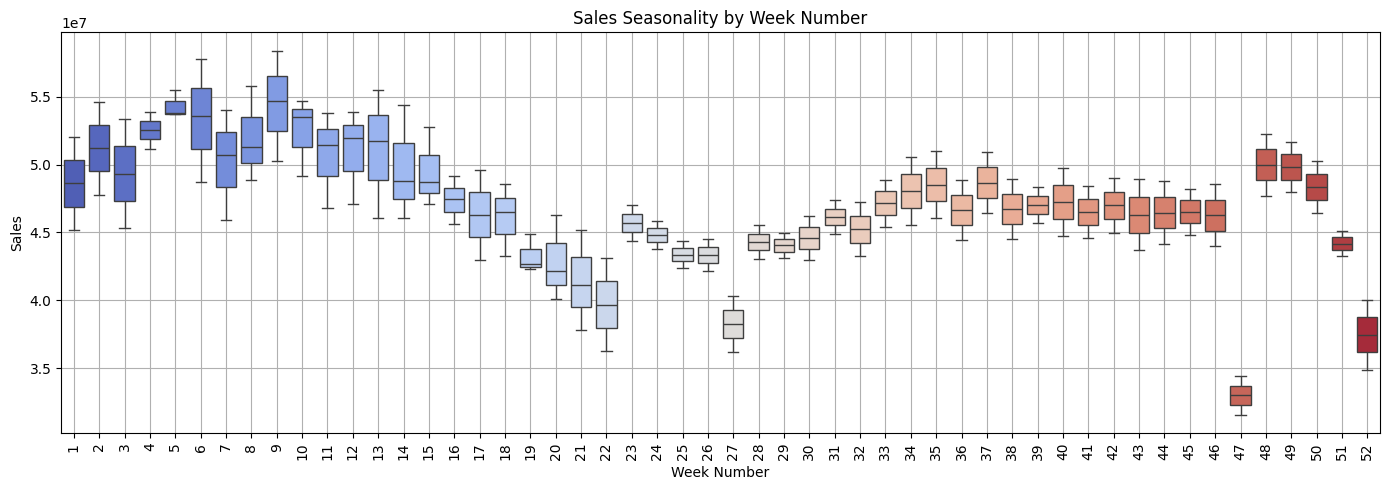

In [7]:
# Prepare figure for seasonality by Week
plt.figure(figsize=(14, 5))
sns.boxplot(data=df, x='Week', y='Sales', palette='coolwarm')
plt.title('Sales Seasonality by Week Number')
plt.xlabel('Week Number')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


#### 1. **Strong Start (Weeks 2–9)**

- Early weeks consistently perform best — likely fueled by New Year energy, fresh budgets, and winter demand. Sales are solid and stable here.

#### 2. **Summer Slump (Weeks 19–27)**

- Clear dip mid-year, especially around Weeks 26–27. Likely a mix of low seasonal demand and quiet marketing periods.

#### 3. **Slow Climb Back (Weeks 30–38)**

- Sales pick up gradually — could be tied to back-to-school or early festive buildup.

#### 4. **Holiday Peaks & Drops (Weeks 48–52)**

- Big spike during holiday weeks (48–50), but things cool off fast by Week 51–52 — likely year-end closures or post-holiday fatigue.

#### 5. **Week 47 Anomaly**

- Odd drop just before the holiday push. Could be a campaign miss, reporting gap, or some one-off disruption.

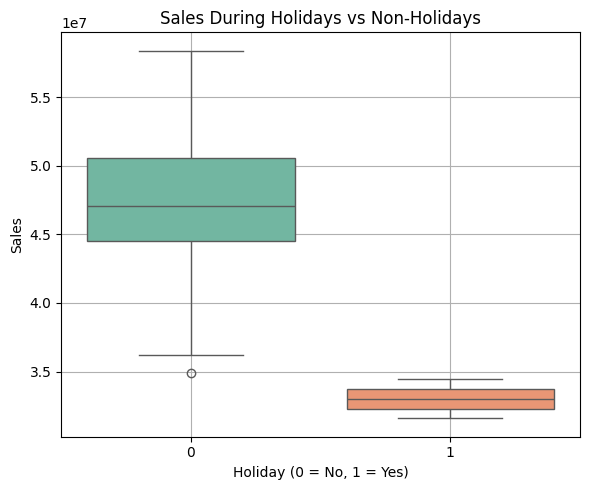

In [8]:
#Compare Sales during Holiday vs Non-Holiday weeks
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='Holiday Dummy', y='Sales', palette='Set2')
plt.title('Sales During Holidays vs Non-Holidays')
plt.xlabel('Holiday (0 = No, 1 = Yes)')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

###  1. **Holiday Sales Lag**

- Surprisingly, sales during holiday weeks are lower — tighter ranges and fewer highs suggest weaker performance overall.

### **Holidays Hurt, Not Help**

- Unlike most CPG trends, holidays aren’t boosting sales here. Could be due to quiet marketing, store closures, or just the wrong kind of holidays.

### 3. **Time to Rethink 'Holidays'**

- Are these promo-driven holidays (like Black Friday)? Or operational breaks?  
    If it's the former, the brand’s missing out. If it’s the latter, they’re correctly modeled as dips.

## **Discount Analysis**

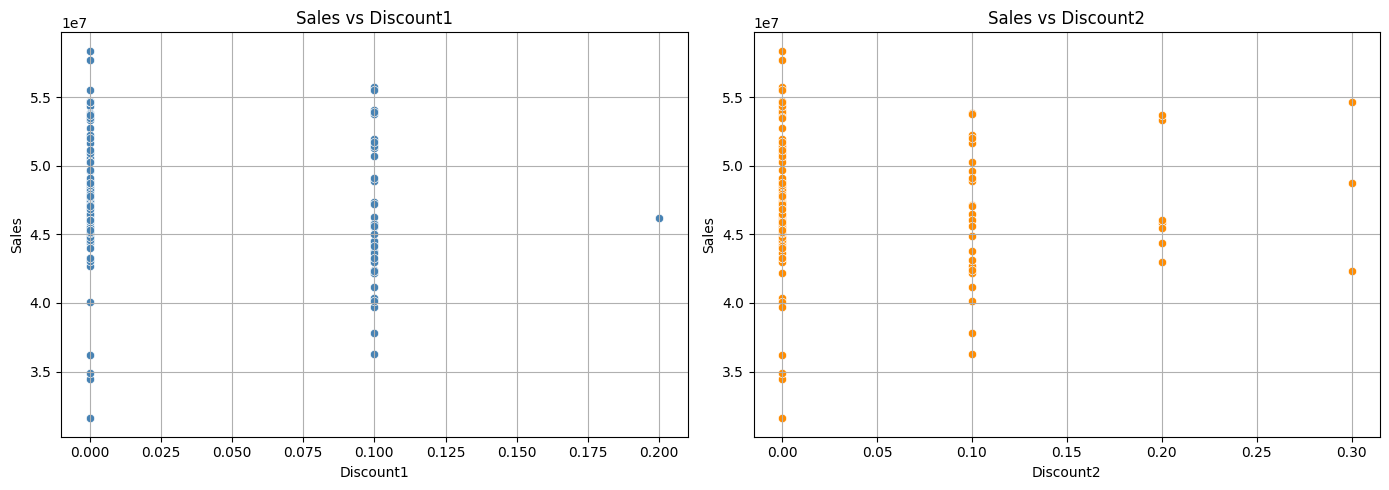

In [9]:
# Visualize the relationship between discounts and sales
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Discount 1 vs Sales
sns.scatterplot(ax=axes[0], data=df, x='Discount1', y='Sales', color='steelblue')
axes[0].set_title('Sales vs Discount1')
axes[0].set_xlabel('Discount1')
axes[0].set_ylabel('Sales')
axes[0].grid(True)

# Discount 2 vs Sales
sns.scatterplot(ax=axes[1], data=df, x='Discount2', y='Sales', color='darkorange')
axes[1].set_title('Sales vs Discount2')
axes[1].set_xlabel('Discount2')
axes[1].set_ylabel('Sales')
axes[1].grid(True)

plt.tight_layout()
plt.show()


### **Discount1:**

- Most data sits at **0% and 10%**, with little variation in sales.
- Surprisingly, some **strongest sales happen with 0% discount**.
- Discounts here seem like a **supporting tactic**, not the main trigger.

### **Discount2:**

- Sales are scattered across 0% to 30% — but **no clear lift with higher discounts**.
- Even at 30%, sales stay moderate — pointing to **diminishing returns** or poorly timed offers.
- Implies a **discount cap**: after a point, slashing prices doesn’t add value.

## **Marketing Spend Analysis**

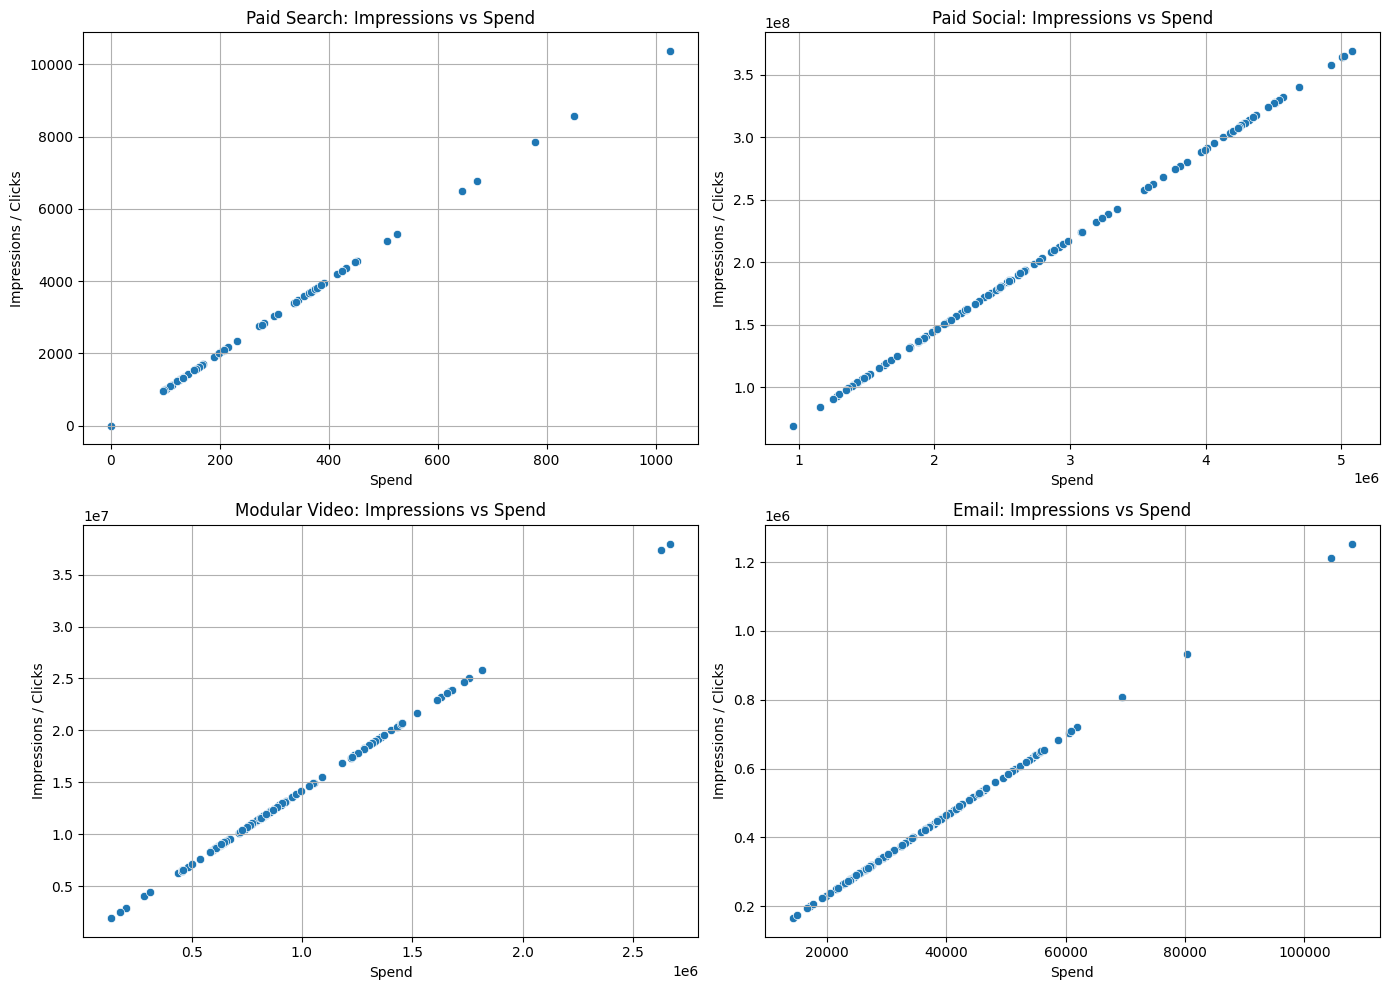

In [10]:
# Select paid channels with both spends and impressions
channels = {
    'Paid Search': ['Paid Search Spends', 'Paid Search Impressions'],
    'Paid Social': ['Paid Social Spends', 'Paid Social Impressions'],
    'Modular Video': ['Modular Video Spends', 'Modular Video Impressions'],
    'Email': ['Email Spends', 'Email Clicks']
}

# Create scatter plots for spend vs impressions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, (channel, cols) in zip(axes.flat, channels.items()):
    spend_col, imp_col = cols
    sns.scatterplot(data=df, x=spend_col, y=imp_col, ax=ax)
    ax.set_title(f'{channel}: Impressions vs Spend')
    ax.set_xlabel('Spend')
    ax.set_ylabel('Impressions / Clicks')
    ax.grid(True)

plt.tight_layout()
plt.show()


### Spend vs. Impressions: Channel-Wise Insights

### **1. Paid Search**

- **Strong positive linearity** between spend and impressions.
- Highly **predictable delivery** — every dollar spent gets proportional visibility.
- Indicates a **well-optimized, auction-based channel**.
### **2. Paid Social**

- Also shows a **positive linear trend**, though slightly more **scattered** than Paid Search.
- Implies some **variance in efficiency** — possibly driven by creative or targeting changes week-to-week.

### **3. Modular Video**

- Linear but with **more noise** and **flat stretches**.
- Suggests potential **thresholds or caps** (e.g., inventory limits or ad fatigue).
- May need **frequency capping** or better pacing strategy.
### **4. Email**

- Very **non-linear** — increasing spend doesn’t always lead to proportional increases in clicks.
- Could indicate:
    - Saturation of the audience (list is finite)
    - Poor targeting or deliverability
    - Need for better creative or subject-line testing


In [11]:
def calculate_media_efficiency(impression, spend):
    """
    Function to calculate media channel efficiency for Email, Organic Search, Modular Video,
    Paid Social, and Paid Search channels. The efficiency is calculated as:
    (Impressions + Clicks) / Spend

    Parameters:
    df (pd.DataFrame): DataFrame containing the columns for clicks, impressions, and spend.

    Returns:
    pd.DataFrame: DataFrame with additional columns for efficiency of each channel.
    """
    efficiency = impression/spend
    # Return the updated DataFrame
    return efficiency


In [12]:
# Group by Year and Month, summing up impressions/clicks and spends for all paid channels
paid_channels_summary = df.groupby(['Year', 'Month']).agg({
    'Paid Search Impressions': 'sum',
    'Paid Search Spends': 'sum',
    'Paid Social Impressions': 'sum',
    'Paid Social Spends': 'sum',
    'Modular Video Impressions': 'sum',
    'Modular Video Spends': 'sum',
    'Email Clicks': 'sum',
    'Email Spends': 'sum'
}).reset_index()

# Display the grouped summary
paid_channels_summary.head()

,Year,Month,Paid Search Impressions,Paid Search Spends,Paid Social Impressions,Paid Social Spends,Modular Video Impressions,Modular Video Spends,Email Clicks,Email Spends
0,2022,2,17762.5,1760.5,1.049896e+09,14454652.3,50092721.0,3520602.3,2342522.0,201668.6
1,2022,3,12330.5,1222.2,7.876870e+08,10844641.8,36587999.0,2571467.2,2371197.5,204137.2
2,2022,4,20020.0,1984.3,9.655043e+08,13292778.7,70096092.5,4926473.4,2975073.5,256125.2
3,2022,5,18123.0,1796.2,9.458241e+08,13021827.4,35772212.0,2514132.4,1906348.5,164118.2
4,2022,6,9649.5,956.4,6.936977e+08,9550625.4,45964212.0,3230443.4,2154036.5,185441.7


In [13]:
# Apply the calculate_media_efficiency function to each channel in the paid_channels_summary dataframe
paid_channels_summary['Paid Search Efficiency'] = calculate_media_efficiency(
    paid_channels_summary['Paid Search Impressions'], paid_channels_summary['Paid Search Spends']
)
paid_channels_summary['Paid Social Efficiency'] = calculate_media_efficiency(
    paid_channels_summary['Paid Social Impressions'], paid_channels_summary['Paid Social Spends']
)
paid_channels_summary['Modular Video Efficiency'] = calculate_media_efficiency(
    paid_channels_summary['Modular Video Impressions'], paid_channels_summary['Modular Video Spends']
)
paid_channels_summary['Email Efficiency'] = calculate_media_efficiency(
    paid_channels_summary['Email Clicks'], paid_channels_summary['Email Spends']
)

# Display the updated dataframe
paid_channels_summary.head()

,Year,Month,Paid Search Impressions,Paid Search Spends,Paid Social Impressions,Paid Social Spends,Modular Video Impressions,Modular Video Spends,Email Clicks,Email Spends,Paid Search Efficiency,Paid Social Efficiency,Modular Video Efficiency,Email Efficiency
0,2022,2,17762.5,1760.5,1.049896e+09,14454652.3,50092721.0,3520602.3,2342522.0,201668.6,10.089463,72.633748,14.228452,11.615700
1,2022,3,12330.5,1222.2,7.876870e+08,10844641.8,36587999.0,2571467.2,2371197.5,204137.2,10.088774,72.633748,14.228453,11.615705
2,2022,4,20020.0,1984.3,9.655043e+08,13292778.7,70096092.5,4926473.4,2975073.5,256125.2,10.089200,72.633748,14.228452,11.615700
3,2022,5,18123.0,1796.2,9.458241e+08,13021827.4,35772212.0,2514132.4,1906348.5,164118.2,10.089634,72.633748,14.228452,11.615704
4,2022,6,9649.5,956.4,6.936977e+08,9550625.4,45964212.0,3230443.4,2154036.5,185441.7,10.089398,72.633748,14.228453,11.615707


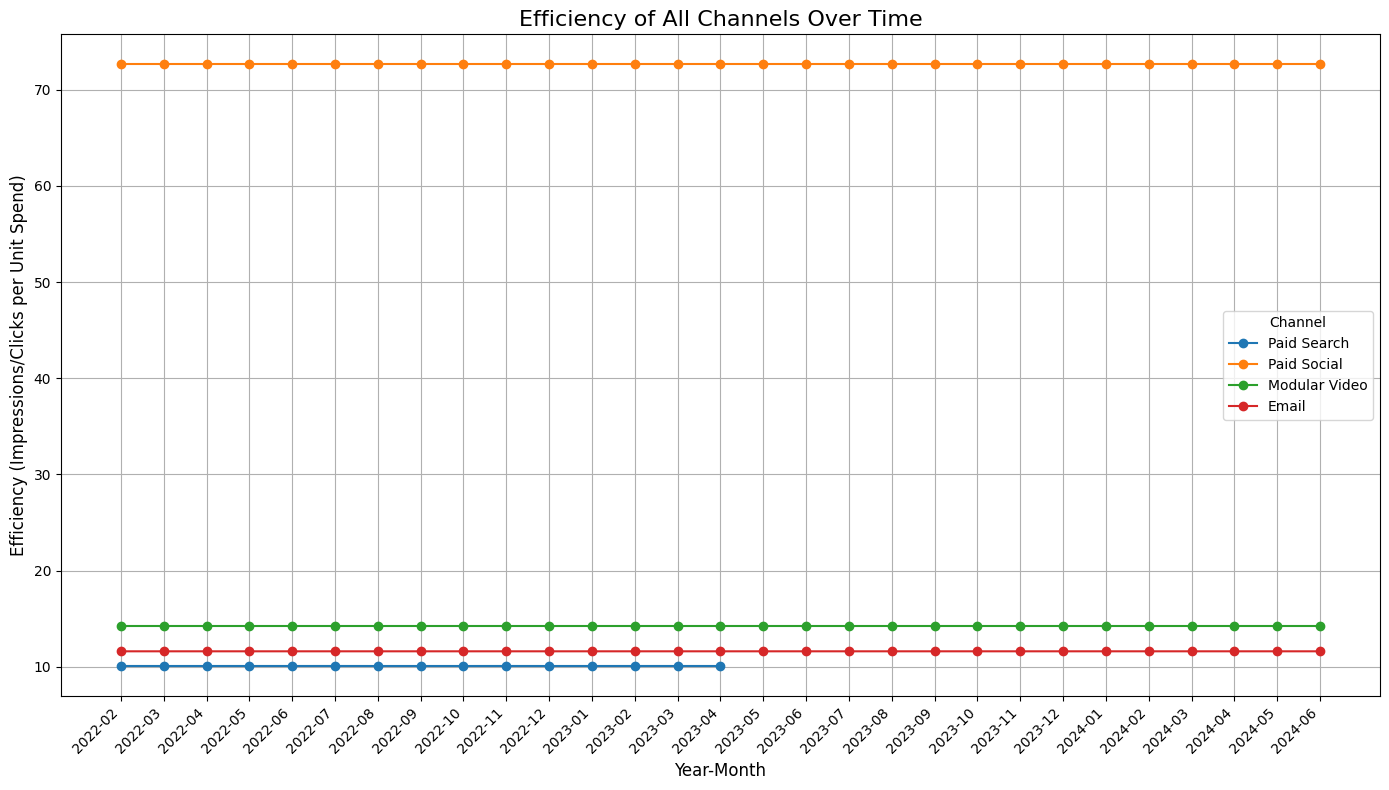

In [14]:
# Plot efficiency of all channels over time
plt.figure(figsize=(14, 8))

# Plot each channel's efficiency
plt.plot(paid_channels_summary['Year'].astype(str) + '-' + paid_channels_summary['Month'].astype(str).str.zfill(2),
         paid_channels_summary['Paid Search Efficiency'], label='Paid Search', marker='o')
plt.plot(paid_channels_summary['Year'].astype(str) + '-' + paid_channels_summary['Month'].astype(str).str.zfill(2),
         paid_channels_summary['Paid Social Efficiency'], label='Paid Social', marker='o')
plt.plot(paid_channels_summary['Year'].astype(str) + '-' + paid_channels_summary['Month'].astype(str).str.zfill(2),
         paid_channels_summary['Modular Video Efficiency'], label='Modular Video', marker='o')
plt.plot(paid_channels_summary['Year'].astype(str) + '-' + paid_channels_summary['Month'].astype(str).str.zfill(2),
         paid_channels_summary['Email Efficiency'], label='Email', marker='o')

# Customize the plot
plt.title('Efficiency of All Channels Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Efficiency (Impressions/Clicks per Unit Spend)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Channel')
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# Step: Calculate media channel efficiency — Impressions/Clicks per 1 unit of spend

# Initialize an empty dictionary to store results
efficiency_data = {
    'Channel': [],
    'Avg Spend': [],
    'Avg Impressions/Clicks': [],
    'Impressions/Clicks per 1 Unit Spend': []
}

# Loop through each paid channel and compute average spend, impressions, and efficiency
for channel, (spend_col, imp_col) in channels.items():
    
    # Compute average spend and average impressions/clicks
    avg_spend = df[spend_col].mean()
    avg_impressions = df[imp_col].mean()
    
    # Calculate efficiency as impressions (or clicks) per 1 unit of spend
    efficiency = avg_impressions / avg_spend if avg_spend else 0

    # Append computed metrics to results dictionary
    efficiency_data['Channel'].append(channel)
    efficiency_data['Avg Spend'].append(avg_spend)
    efficiency_data['Avg Impressions/Clicks'].append(avg_impressions)
    efficiency_data['Impressions/Clicks per 1 Unit Spend'].append(efficiency)

# Convert the dictionary into a DataFrame for analysis
efficiency_df = pd.DataFrame(efficiency_data)

# Sort the channels by efficiency in descending order
efficiency_df.sort_values(by='Impressions/Clicks per 1 Unit Spend', ascending=False, inplace=True)

# Reset index after sorting
efficiency_df.reset_index(drop=True, inplace=True)

# Display the final efficiency comparison
efficiency_df


,Channel,Avg Spend,Avg Impressions/Clicks,Impressions/Clicks per 1 Unit Spend
0,Paid Social,2.792205e+06,2.028083e+08,72.633748
1,Modular Video,9.433634e+05,1.342260e+07,14.228452
2,Email,3.773454e+04,4.383132e+05,11.615704
3,Paid Search,2.970097e+02,2.996621e+03,10.089304


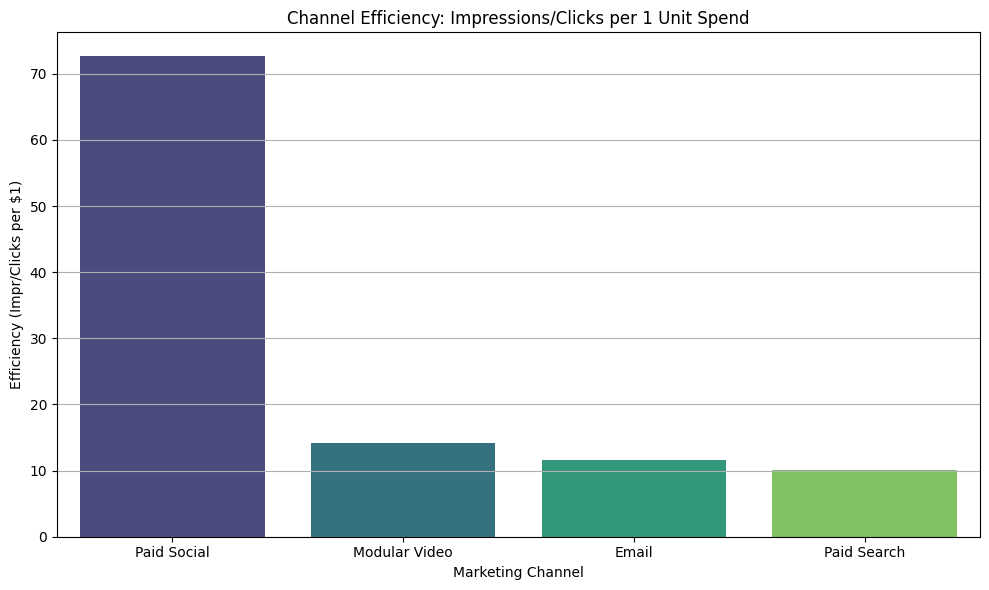

In [16]:
# Bar plot of efficiency across channels
plt.figure(figsize=(10, 6))
sns.barplot(
    data=efficiency_df,
    x='Channel',
    y='Impressions/Clicks per 1 Unit Spend',
    palette='viridis'
)
plt.title('Channel Efficiency: Impressions/Clicks per 1 Unit Spend')
plt.ylabel('Efficiency (Impr/Clicks per $1)')
plt.xlabel('Marketing Channel')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



### **Efficiency Analysis Across Marketing Channels**

**1. Paid Social demonstrates the highest efficiency**

- With a consistent efficiency value of approximately **72.63**, Paid Social significantly outperforms other channels in terms of impressions per unit spend.
    
- This suggests an excellent return on investment and stable performance over time.
    

**2. Modular Video ranks second in efficiency**

- Modular Video maintains an efficiency of around **14.23**, indicating a relatively strong performance.
    
- Its consistency suggests effective budget allocation and campaign management within this channel.
    

**3. Email channel shows stable but moderate efficiency**

- Email's efficiency stands at approximately **11.62**, indicating decent performance with reliable returns.
    
- While not the highest, its stability suggests it remains a dependable channel for engagement.
    

**4. Paid Search exhibits the lowest efficiency**

- At around **10.09**, Paid Search trails behind the other channels in efficiency.
    
- This could be due to higher competition or cost-per-click, suggesting a potential need for further optimization or reallocation of budget.
    

**5. Channel efficiencies are highly consistent over time**

- All channels show minimal variation in efficiency month-over-month, indicating a stable media execution strategy.
    
- However, the lack of fluctuations might also reflect limited experimentation or optimization efforts.

## **Organic vs. Paid Traffic Contributions**

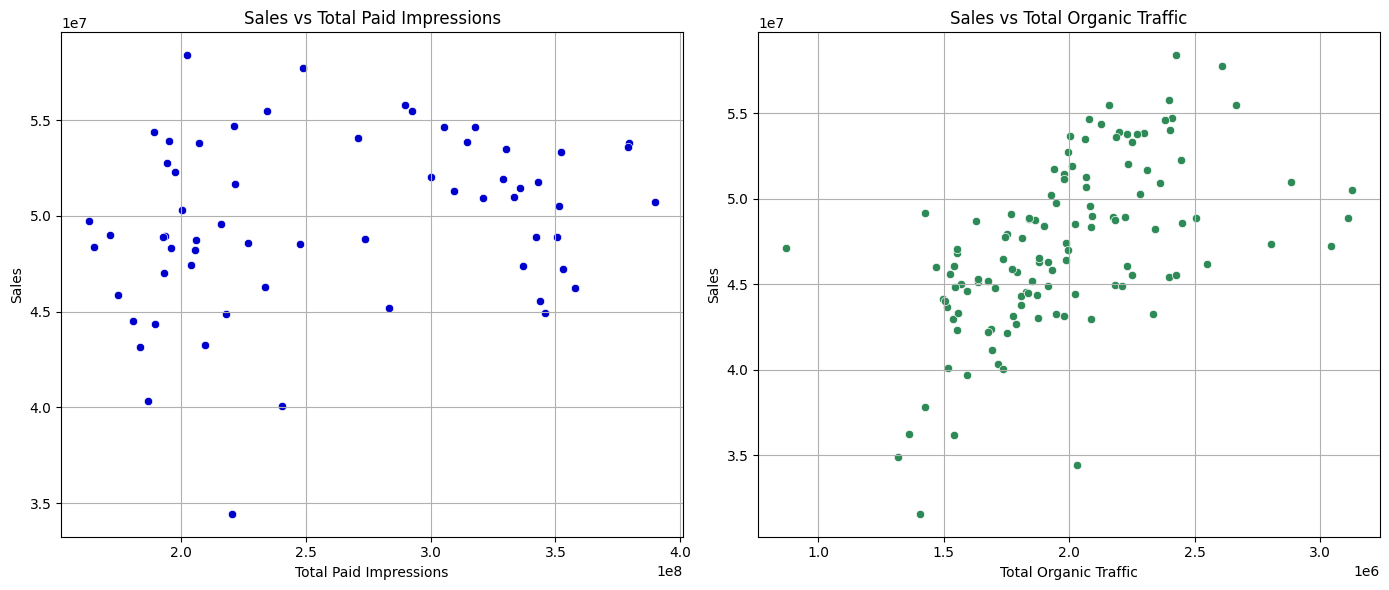

In [17]:
# Define total paid and organic impressions/clicks
df['Total Paid Impressions'] = (
    df['Paid Search Impressions'] +
    df['Paid Social Impressions'] +
    df['Modular Video Impressions'] +
    df['Email Clicks']
)

df['Total Organic Traffic'] = df['Organic Search Impressions']

# Scatter plot: Sales vs Paid and Organic
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Paid Traffic vs Sales
sns.scatterplot(data=df, x='Total Paid Impressions', y='Sales', ax=axes[0], color='mediumblue')
axes[0].set_title('Sales vs Total Paid Impressions')
axes[0].set_xlabel('Total Paid Impressions')
axes[0].set_ylabel('Sales')
axes[0].grid(True)

# Organic Traffic vs Sales
sns.scatterplot(data=df, x='Total Organic Traffic', y='Sales', ax=axes[1], color='seagreen')
axes[1].set_title('Sales vs Total Organic Traffic')
axes[1].set_xlabel('Total Organic Traffic')
axes[1].set_ylabel('Sales')
axes[1].grid(True)

plt.tight_layout()
plt.show()


### **1. Sales vs Total Paid Impressions**

**Key Observations:**

- The relationship between paid impressions and sales is weak, especially at higher impression volumes.
    
- Beyond approximately 250 million impressions, increases in sales begin to level off.
    
- Higher paid media investment does not consistently lead to higher sales.
    

**Interpretation:**

- This suggests diminishing returns from paid media at scale.
    
- Indicates a potential overspend or inefficiency in the paid strategy.
    
- Reallocation or capping of budget may improve overall return on investment.


### **2. Sales vs Total Organic Traffic**

**Key Observations:**

- There is a clear, positive relationship between organic traffic and sales.
    
- The data shows a consistent upward trend, particularly up to 2.5 million in organic traffic.
    

**Interpretation:**

- Organic channels are more closely aligned with sales growth.
    
- Indicates stronger intent and more efficient conversion from organic sources.
    
- Suggests an opportunity to increase investment in SEO, CRM, and lifecycle marketing efforts.

## **Economic Factor Impact** 

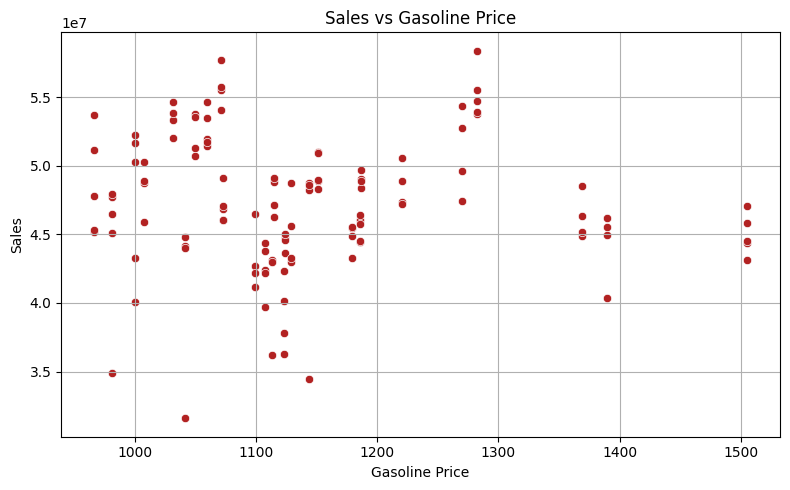

In [18]:
# Plot Sales vs Gasoline Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Gasoline Price', y='Sales', color='firebrick')
plt.title('Sales vs Gasoline Price')
plt.xlabel('Gasoline Price')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()



### **Gasoline Price Impact on Sales – Key Insights**

**1. Mild Negative Relationship**

- As gasoline prices rise, sales show a slight downward trend — especially beyond ₹1300.
- Not a perfect pattern, but the pressure on consumer spending is noticeable.

**2. Stronger Sales at Lower Fuel Prices**

- Higher sales volumes are concentrated when fuel prices are between ₹1000–₹1150.
- This suggests consumers are more comfortable spending on personal care when fuel costs are moderate.
### **Strategic Insight**

- Gasoline prices act as a **proxy for consumer sentiment and spending power**.
- Even in personal care, there's evidence of **price sensitivity** during times of economic strain.

### **Modeling Recommendation**

- Include gasoline price as a **control variable** in marketing mix models (MMM).
- Expect a **small but meaningful negative impact** on sales.
- Consider testing **lag effects**, as spending behavior may adjust over time.

## **Correlations**

In [19]:
# Calculate correlation of all numeric columns with Sales
correlations = df.corr(numeric_only=True)['Sales'].sort_values(ascending=False)

# Show top and bottom correlated variables
correlations    

Sales                         1.000000
Organic Search Impressions    0.563395
Total Organic Traffic         0.563395
Paid Social Impressions       0.392407
Paid Social Spends            0.392407
Paid Search Spends            0.362907
Paid Search Impressions       0.362890
Total Paid Impressions        0.229225
Total SKU                     0.189031
Email Clicks                  0.110840
Email Spends                  0.110840
Modular Video Impressions     0.058470
Modular Video Spends          0.058470
Discount2                    -0.019491
Gasoline Price               -0.050504
Discount1                    -0.170581
Year                         -0.255166
Holiday Dummy                -0.374159
Month                        -0.423293
Week                         -0.439138
Average Price                -0.459618
Name: Sales, dtype: float64

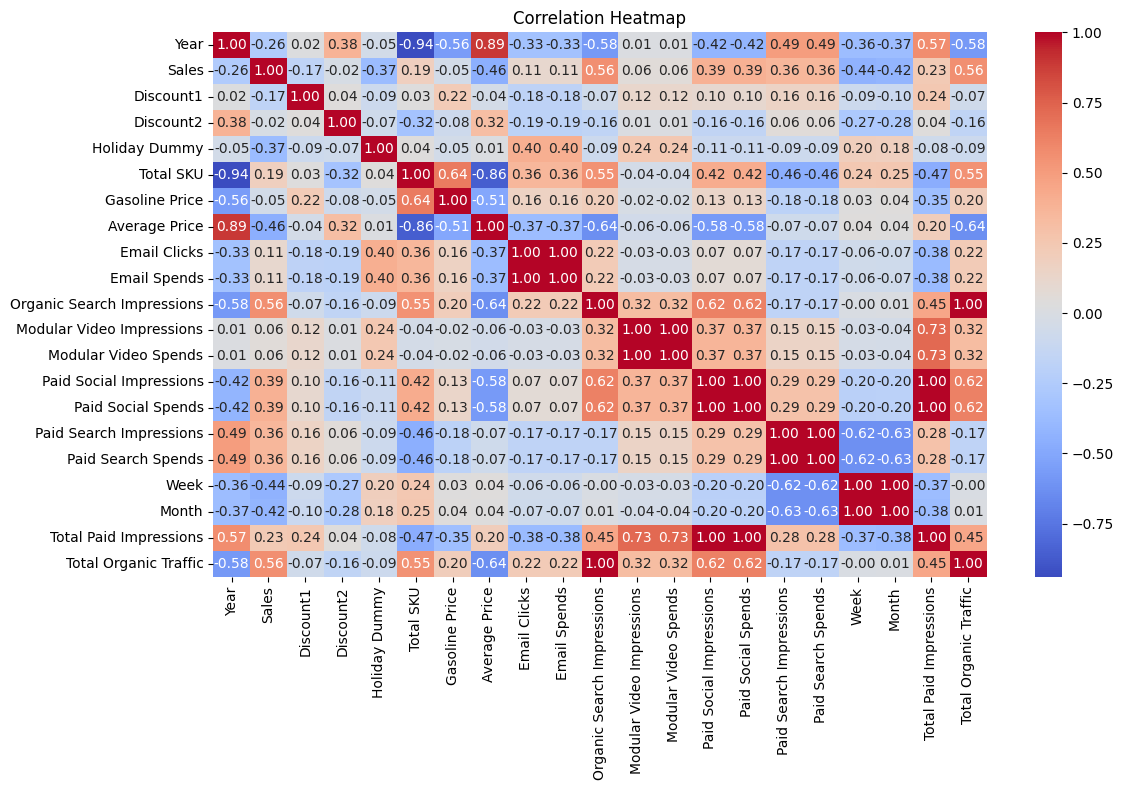

In [20]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


### **Top Positive Drivers of Sales**

- **Organic Search Impressions (+0.56):**  
    Strongest driver — investing in SEO and high-quality content can significantly boost sales.
- **Paid Social (Impressions/Spend) (+0.39):**  
    High-performing channel — delivers both reach and efficiency. Worth scaling smartly.
- **Paid Search (Spend/Impressions) (+0.36):**  
    Steady performer — reflects value from high-intent users actively looking for solutions.
- **Total Organic Traffic (+0.56):**  
    Matches paid in impact — shows the power of nurturing long-term customer relationships.
- **Total SKUs Available (+0.19):**  
    More variety supports slightly higher sales — offering choice helps, though modestly.

### **Strong Negative Correlations with Sales**

- **Average Price (-0.46):**  
    Clear price sensitivity — increasing price tends to reduce sales meaningfully.
- **Discount1 (-0.17):**  
    May not be effective or well-timed — could confuse rather than convert customers.
- **Month / Week (~ -0.42 / -0.44):**  
    Strong seasonal patterns — needs to be factored in to avoid misleading trends.
- **Year (-0.26):**  
    Indicates a possible downward trend over time — suggests looking deeper into long-term shifts.

### **Neutral or Noisy Variables**

- **Modular Video (~0.06):**  
    Very limited impact — might be over-invested relative to returns.
- **Discount2 (-0.02):**  
    Minimal effect — may need to revisit the offer design or targeting strategy.
- **Gasoline Price (-0.05):**  
    Small negative influence — while not strong, it still reflects economic pressure.

### **Modeling Guidance**

- Prioritize **Organic Search, Paid Social, and Paid Search** — they show consistent sales impact.
- Include **Average Price**, **Time (Week/Month)**, and **Gasoline Price** as **control variables** to account for external or structural influences.
- Check for **multicollinearity** — e.g., Paid Social Spend and Impressions are likely highly correlated. Use only one, or combine as a ratio (e.g., cost per impression).
- Explore **interaction effects** — such as Organic × Paid to capture synergy.
- If needed, consider **separate models for Organic and Paid channels** to reduce noise and increase interpretability.